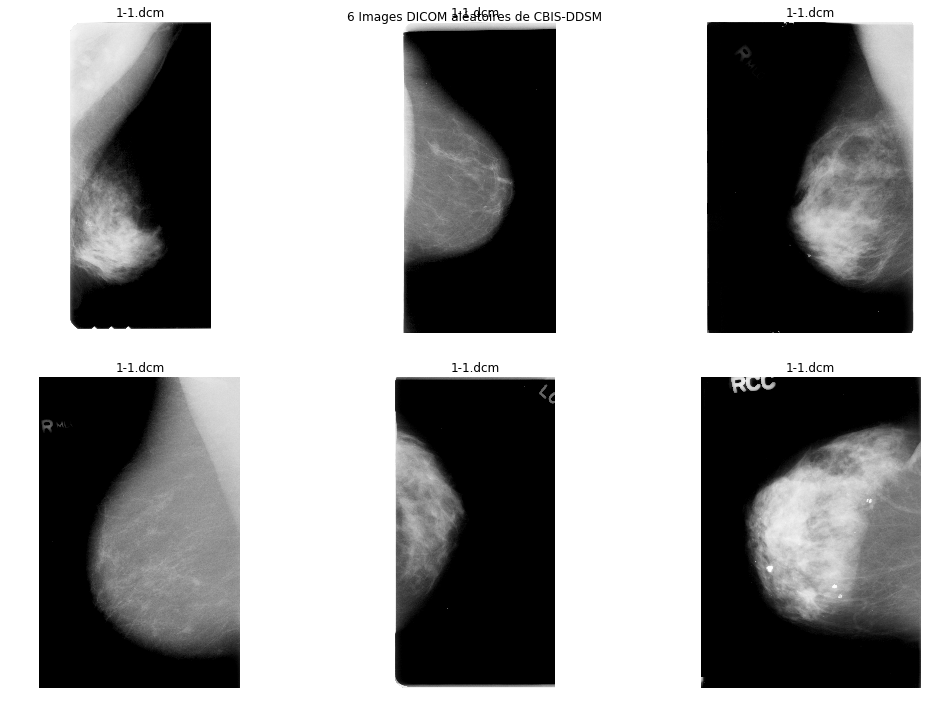

In [3]:
import os
import random
import pydicom
import matplotlib.pyplot as plt

# 🔁 Dossier racine de la base CBIS-DDSM
root_dir = "CBIS-DDSM_NoFull"  # ⬅️ Change ce chemin

# 📦 Récupérer tous les chemins .dcm
dicom_paths = []
for root, dirs, files in os.walk(root_dir):
    for file in files:
        if file.endswith(".dcm"):
            dicom_paths.append(os.path.join(root, file))

# 🎲 Sélection aléatoire de 6 fichiers
sample_paths = random.sample(dicom_paths, 6)

# 🖼️ Affichage
plt.figure(figsize=(15, 10))
for i, path in enumerate(sample_paths):
    ds = pydicom.dcmread(path)
    plt.subplot(2, 3, i + 1)
    plt.imshow(ds.pixel_array, cmap='gray')
    plt.axis("off")
    plt.title(os.path.basename(path))
plt.suptitle("6 Images DICOM aléatoires de CBIS-DDSM")
plt.tight_layout()
plt.show()


In [6]:
import os
import random
import pydicom
import matplotlib.pyplot as plt

# 📂 Remplace par le chemin local vers ta base CBIS-DDSM
root_dir = "CBIS-DDSM_NoFull"  # ⬅️ modifie ici

# 🔍 Cherche tous les fichiers .dcm
dicom_paths = []
for root, dirs, files in os.walk(root_dir):
    for file in files:
        if file.lower().endswith(".dcm"):
            dicom_paths.append(os.path.join(root, file))

print(f"🔎 Total de fichiers DICOM trouvés : {len(dicom_paths)}")

# 🎲 Prend 6 fichiers aléatoires
sample_paths = random.sample(dicom_paths, 6)

# 📥 Convertir et sauvegarder les images
output_dir = "images_random_cbis"
os.makedirs(output_dir, exist_ok=True)

for i, dicom_path in enumerate(sample_paths):
    ds = pydicom.dcmread(dicom_path)
    img = ds.pixel_array
    filename = f"cbis_image_{i+1}.png"
    full_path = os.path.join(output_dir, filename)
    plt.imsave(full_path, img, cmap='gray')
    print(f"✅ Image sauvegardée : {full_path}")


🔎 Total de fichiers DICOM trouvés : 3103
✅ Image sauvegardée : images_random_cbis/cbis_image_1.png
✅ Image sauvegardée : images_random_cbis/cbis_image_2.png
✅ Image sauvegardée : images_random_cbis/cbis_image_3.png
✅ Image sauvegardée : images_random_cbis/cbis_image_4.png
✅ Image sauvegardée : images_random_cbis/cbis_image_5.png
✅ Image sauvegardée : images_random_cbis/cbis_image_6.png


🔎 Total DICOM trouvés : 3103
✅ Image originale sauvegardée : output_images/image_originale.png
✅ Image redimensionnée sauvegardée : output_images/image_redimensionnee_512x512.png


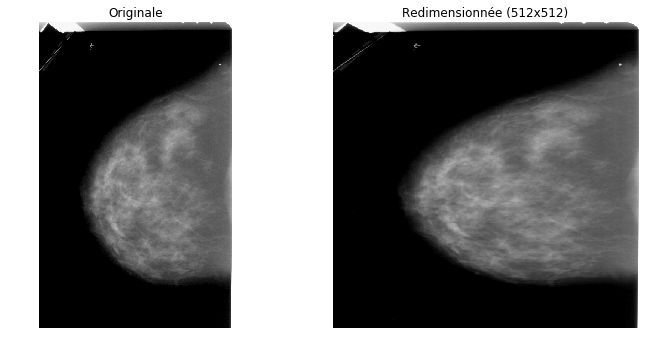

In [8]:
import os
import random
import pydicom
import matplotlib.pyplot as plt
import cv2
import numpy as np

# 📂 Dossier contenant les DICOM
root_dir = "CBIS-DDSM_NoFull"

# 🔍 Liste des fichiers .dcm
dicom_paths = []
for root, dirs, files in os.walk(root_dir):
    for file in files:
        if file.lower().endswith(".dcm"):
            dicom_paths.append(os.path.join(root, file))

print(f"🔎 Total DICOM trouvés : {len(dicom_paths)}")

# 🎯 Choix aléatoire d'un fichier
dicom_path = random.choice(dicom_paths)

# 📖 Lecture et conversion en image
ds = pydicom.dcmread(dicom_path)
img_original = ds.pixel_array
img_resized = cv2.resize(img_original, (512, 512), interpolation=cv2.INTER_AREA)

# 📁 Sauvegarde locale
output_dir = "output_images"
os.makedirs(output_dir, exist_ok=True)

original_path = os.path.join(output_dir, "image_originale.png")
resized_path = os.path.join(output_dir, "image_redimensionnee_512x512.png")

plt.imsave(original_path, img_original, cmap='gray')
plt.imsave(resized_path, img_resized, cmap='gray')

print(f"✅ Image originale sauvegardée : {original_path}")
print(f"✅ Image redimensionnée sauvegardée : {resized_path}")

# 🖼️ Affichage
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_original, cmap='gray')
plt.title("Originale")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_resized, cmap='gray')
plt.title("Redimensionnée (512x512)")
plt.axis("off")

plt.tight_layout()
plt.show()
